In [1]:
# importing required libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 1. READING AND UNDERSTANDING DATA

In [2]:
# importing data 
retail_df = pd.read_excel(r"C:\Users\91810\Downloads\Online Retail Data Set.xlsx")

In [3]:
# overview of data
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# shape
retail_df.shape

(541909, 8)

# 2. DATA CLEANING

In [5]:
# numerical summary retail_df
retail_df[["Quantity","UnitPrice"]].describe(percentiles=[.01,.05,.1,.25])

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
1%,-2.000000,0.190000
5%,1.000000,0.420000
10%,1.000000,0.630000
25%,1.000000,1.250000
50%,3.000000,2.080000
max,80995.000000,38970.000000


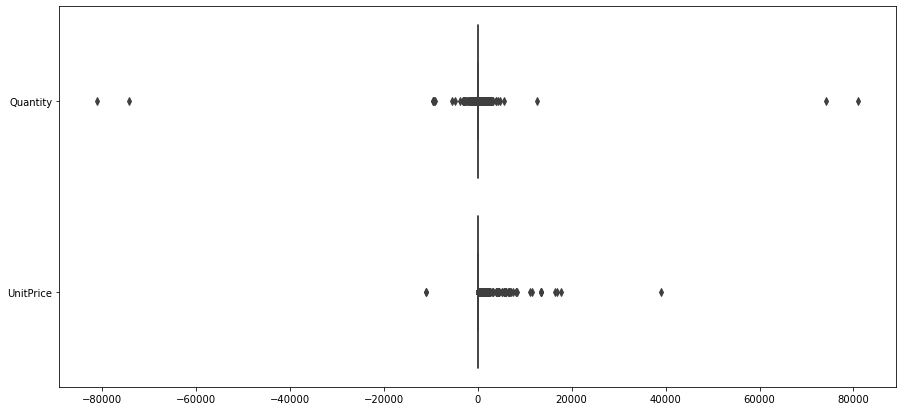

In [6]:
# boxplot 
plt.figure(figsize=[15,7])
sns.boxplot(data=retail_df[["Quantity","UnitPrice"]],orient="horizontal")
plt.show()

- there are lots of Quantity and UnitPrice with **negative values.**

In [7]:
# looking rows with negative values of Quantity
neg_quant = retail_df[retail_df.Quantity<0]
neg_quant

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


- rows with **negative Quantity** values show orders that are **returned,** thus **removing** these data as they are **redundant** for our analysis.

In [8]:
# removing rows with negative quantity
retail_df_new = retail_df[retail_df.Quantity>=0]
retail_df_new.shape

(531285, 8)

In [9]:
# looking for rows with negative UnitPrice
retail_df_new[retail_df_new.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


- **removing** row with **negative UnitPrice** as they are redundant for our analysis.

In [10]:
# removing negative UnitPrice rows
retail_df_new2 = retail_df_new[retail_df_new.UnitPrice>=0]
retail_df_new2.shape

(531283, 8)

In [11]:
# exporting cleaned data
retail_df_new2.to_excel("clean_retail_df.xlsx",index=False)